In [19]:
import os
#import timeit
import random
import pandas as pd
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
#from shapely.geometry import Point

### below are main functions from pysal
### pysal is created by the same group of people who created Geoda
from pysal.lib import weights
from libpysal.weights import lat2W, higher_order, Queen, Rook
from pysal.explore import esda
#from pysal.viz.splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import splot
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm  # for the progress bar (running permutation)

    Name                                         descriptio timestamp begin  \
0  kml_1  <center><table><tr><th colspan='2' align='cent...      None  None   
1  kml_2  <center><table><tr><th colspan='2' align='cent...      None  None   
2  kml_3  <center><table><tr><th colspan='2' align='cent...      None  None   
3  kml_4  <center><table><tr><th colspan='2' align='cent...      None  None   
4  kml_5  <center><table><tr><th colspan='2' align='cent...      None  None   

    end altitudeMo  tessellate  extrude  visibility drawOrder  ...  \
0  None       None          -1        0          -1      None  ...   
1  None       None          -1        0          -1      None  ...   
2  None       None          -1        0          -1      None  ...   
3  None       None          -1        0          -1      None  ...   
4  None       None          -1        0          -1      None  ...   

       FMEL_UPD_D snippet     residentia    commercial      business  \
0  20191223152313    None       

<Axes: >

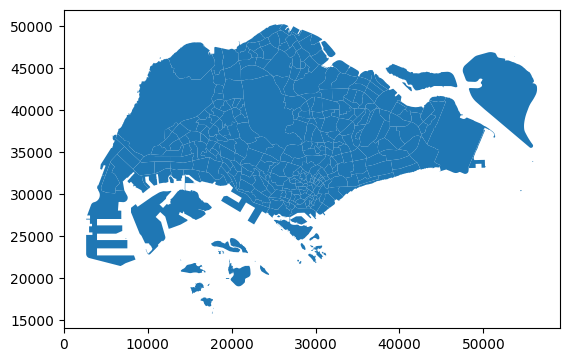

In [2]:
base2 = gpd.read_file('../master-plan-2019-subzone_landuse_area.shp')
base2 = base2.to_crs('epsg:3414')
print(base2.head())
base2.plot()

In [13]:
w = weights.Queen.from_dataframe(base2, idVariable='SUBZONE_N')

/home/benny/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 5 islands with ids: NORTH-EASTERN ISLANDS, PULAU SELETAR, SEMAKAU, SOUTHERN GROUP, SUDONG.
  warnings.warn(message)


disconnected components mean that they are not spatially connected, e.g., 6 main islands that contain neighbors within themselves. 

islands are single spatial unit that does not connect to anyone else. 

In [30]:
#wrook = Rook.from_dataframe(base2)

In [28]:
base2.head()[['SUBZONE_N']]

,SUBZONE_N
0,MARINA EAST
1,INSTITUTION HILL
2,ROBERTSON QUAY
3,JURONG ISLAND AND BUKOM
4,FORT CANNING


In [29]:
w.neighbors['MARINA EAST']

['MARINA CENTRE', 'MARINA EAST (MP)', 'TANJONG RHU', 'MARINA SOUTH', 'NICOLL']

In [32]:
w.histogram  # number of neighbors

[(0, 5),
 (1, 2),
 (2, 5),
 (3, 10),
 (4, 28),
 (5, 75),
 (6, 90),
 (7, 54),
 (8, 38),
 (9, 17),
 (10, 3),
 (11, 2),
 (12, 1),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 2)]

In [38]:
w_dist = weights.DistanceBand.from_dataframe(base2, ids='SUBZONE_N',threshold=1500, binary=False)

/home/benny/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 41 disconnected components.
 There are 30 islands with ids: JURONG ISLAND AND BUKOM, SUDONG, SEMAKAU, SOUTHERN GROUP, SENTOSA, JURONG PORT, TUAS PROMENADE, CHANGI BAY, NATURE RESERVE, TAMPINES EAST, SWISS CLUB, XILIN, SIMEI, SELETAR, SELETAR AEROSPACE PARK, PAYA LEBAR NORTH, CHANGI POINT, PASIR RIS WAFER FAB PARK, GALI BATU, CENTRAL WATER CATCHMENT, TUAS BAY, TUAS VIEW, CHANGI AIRPORT, PULAU PUNGGOL TIMOR, TURF CLUB, MURAI, PULAU PUNGGOL BARAT, NORTH-EASTERN ISLANDS, LIM CHU KANG, TUAS VIEW EXTENSION.
  warnings.warn(message)


In [39]:
w_dist.histogram

[(0, 30),
 (1, 31),
 (2, 47),
 (3, 30),
 (4, 41),
 (5, 33),
 (6, 28),
 (7, 10),
 (8, 13),
 (9, 8),
 (10, 5),
 (11, 2),
 (12, 4),
 (13, 6),
 (14, 5),
 (15, 1),
 (16, 7),
 (17, 1),
 (18, 7),
 (19, 5),
 (20, 4),
 (21, 2),
 (22, 6),
 (23, 4),
 (24, 0),
 (25, 1),
 (26, 1)]

higher order contiguity neighbors

In [4]:
w = weights.Queen.from_dataframe(base2, idVariable='SUBZONE_N')
w3 = higher_order(w, 3)
w.transform = 'R'
w3.transform = 'R'

('WARNING: ', 'SUDONG', ' is an island (no neighbors)')
('WARNING: ', 'SEMAKAU', ' is an island (no neighbors)')
('WARNING: ', 'SOUTHERN GROUP', ' is an island (no neighbors)')
('WARNING: ', 'NORTH-EASTERN ISLANDS', ' is an island (no neighbors)')
('WARNING: ', 'PULAU SELETAR', ' is an island (no neighbors)')
('WARNING: ', 'NORTH-EASTERN ISLANDS', ' is an island (no neighbors)')
('WARNING: ', 'PULAU SELETAR', ' is an island (no neighbors)')
('WARNING: ', 'SEMAKAU', ' is an island (no neighbors)')
('WARNING: ', 'SOUTHERN GROUP', ' is an island (no neighbors)')
('WARNING: ', 'SUDONG', ' is an island (no neighbors)')


/home/benny/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 5 islands with ids: NORTH-EASTERN ISLANDS, PULAU SELETAR, SEMAKAU, SOUTHERN GROUP, SUDONG.
  warnings.warn(message)


In [33]:
w3.histogram

[(0, 5),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 1),
 (7, 1),
 (8, 3),
 (9, 5),
 (10, 3),
 (11, 2),
 (12, 2),
 (13, 7),
 (14, 12),
 (15, 11),
 (16, 19),
 (17, 16),
 (18, 21),
 (19, 22),
 (20, 24),
 (21, 23),
 (22, 16),
 (23, 24),
 (24, 18),
 (25, 19),
 (26, 13),
 (27, 11),
 (28, 8),
 (29, 6),
 (30, 2),
 (31, 2),
 (32, 2),
 (33, 3),
 (34, 2),
 (35, 7),
 (36, 1),
 (37, 2),
 (38, 2),
 (39, 1),
 (40, 1),
 (41, 3),
 (42, 2),
 (43, 3),
 (44, 1),
 (45, 0),
 (46, 0),
 (47, 1),
 (48, 4),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 1)]

for each of the spatial weighting schemes: 
1. Queens, 
2. Rook, 
3. Queens-3 levels, 
4. Rook-3 levels, 
5. distance band (2000 m)

Count the 
- number of islands, 
- number of components, 
- min numbers of neighbors, 
- max numbers of neighbors, and 
- average numbers of neighbors. 

In [40]:
df_bus = pd.read_csv('ODIO_all_202306.csv.xz')
df_bus

,ind,year_month,Hour_of_day,subz,plna,regn,Weekday_incoming,Weekday_outgoing,Weekend_incoming,Weekend_outgoing
0,0,202306,4,BUKIT MERAH,BUKIT MERAH,CENTRAL REGION,0.681818,0.045455,0.625,0.000
1,1,202306,4,NORTH COAST,WOODLANDS,NORTH REGION,0.045455,0.090909,0.000,0.000
2,2,202306,4,TAMPINES EAST,TAMPINES,EAST REGION,0.045455,0.000000,0.000,0.250
3,3,202306,5,ADMIRALTY,SEMBAWANG,NORTH REGION,25.000000,49.681818,14.625,31.125
4,4,202306,5,ALEXANDRA HILL,BUKIT MERAH,CENTRAL REGION,77.500000,78.863636,54.125,49.375
...,...,...,...,...,...,...,...,...,...,...
6167,6167,202306,25,YISHUN SOUTH,YISHUN,NORTH REGION,5.590909,7.818182,6.625,9.875
6168,6168,202306,25,YISHUN WEST,YISHUN,NORTH REGION,4.818182,8.227273,7.000,11.000
6169,6169,202306,25,YUHUA EAST,JURONG EAST,WEST REGION,2.272727,0.818182,2.000,1.500
6170,6170,202306,25,YUHUA WEST,JURONG EAST,WEST REGION,5.363636,3.000000,7.750,4.250


In [41]:
df_bus.columns

Index(['ind', 'year_month', 'Hour_of_day', 'subz', 'plna', 'regn',
       'Weekday_incoming', 'Weekday_outgoing', 'Weekend_incoming',
       'Weekend_outgoing'],
      dtype='object')

In [42]:
df_bus2 = df_bus[df_bus['Hour_of_day']<9]
df_bus2 = df_bus2[df_bus2['Hour_of_day']>=7]
df_bus2 = df_bus2.groupby(['subz'])[['Weekday_incoming', 'Weekday_outgoing', 'Weekend_incoming', 'Weekend_outgoing']].sum().reset_index()
len(df_bus2)

303

<Axes: xlabel='Weekday_incoming', ylabel='Density'>

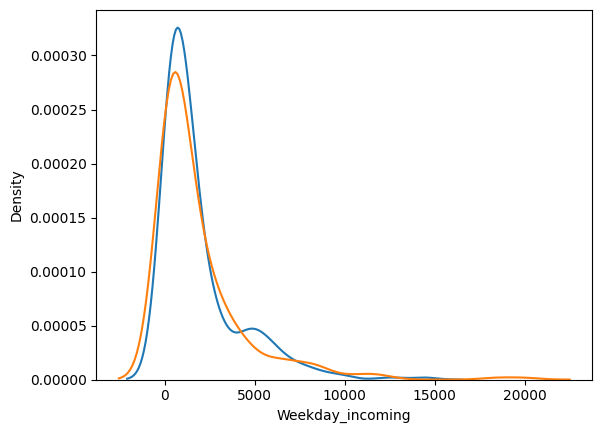

In [43]:
sns.kdeplot(df_bus2['Weekday_incoming'])
sns.kdeplot(df_bus2['Weekday_outgoing'])

join the two tables, to generate geodataframe for bus data

In [45]:
bus_merged = base2.merge(df_bus2, left_on='SUBZONE_N', right_on='subz')
bus_merged = bus_merged[df_bus2.columns.tolist() + ['geometry']]
bus_merged.head()

,subz,Weekday_incoming,Weekday_outgoing,Weekend_incoming,Weekend_outgoing,geometry
0,INSTITUTION HILL,1176.136364,694.272727,714.000,364.375,"POLYGON Z ((28481.446 30886.220 0.000, 28483.4..."
1,ROBERTSON QUAY,447.045455,252.909091,316.000,183.125,"POLYGON Z ((28087.344 30540.999 0.000, 28087.5..."
2,FORT CANNING,281.681818,58.136364,147.750,49.500,"POLYGON Z ((29542.526 31041.199 0.000, 29553.7..."
3,SENTOSA,39.272727,1.863636,53.125,2.250,"MULTIPOLYGON Z (((26885.444 26668.312 0.000, 2..."
4,CITY TERMINALS,353.227273,155.136364,164.875,98.250,"POLYGON Z ((27891.151 28325.195 0.000, 28200.0..."


In [49]:
bus_merged['area'] = bus_merged.area / 1000000
bus_merged.head()

,subz,Weekday_incoming,Weekday_outgoing,Weekend_incoming,Weekend_outgoing,geometry,area
0,INSTITUTION HILL,1176.136364,694.272727,714.000,364.375,"POLYGON Z ((28481.446 30886.220 0.000, 28483.4...",0.392563
1,ROBERTSON QUAY,447.045455,252.909091,316.000,183.125,"POLYGON Z ((28087.344 30540.999 0.000, 28087.5...",0.506589
2,FORT CANNING,281.681818,58.136364,147.750,49.500,"POLYGON Z ((29542.526 31041.199 0.000, 29553.7...",0.388733
3,SENTOSA,39.272727,1.863636,53.125,2.250,"MULTIPOLYGON Z (((26885.444 26668.312 0.000, 2...",4.919833
4,CITY TERMINALS,353.227273,155.136364,164.875,98.250,"POLYGON Z ((27891.151 28325.195 0.000, 28200.0...",3.451568


In [52]:
bus_merged['Weekday_incoming_dens'] = bus_merged['Weekday_incoming'] / bus_merged['area']
bus_merged['Weekday_outgoing_dens'] = bus_merged['Weekday_outgoing'] / bus_merged['area']

<Axes: >

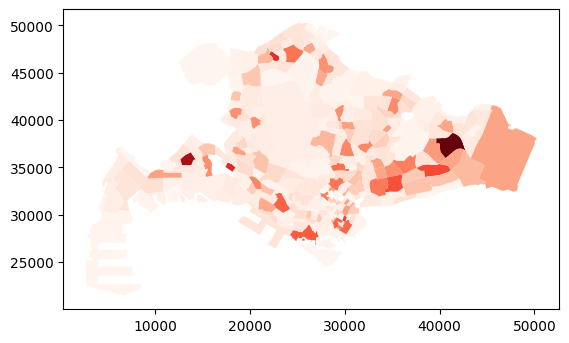

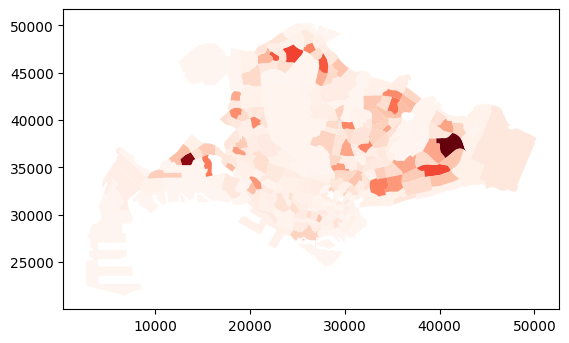

In [53]:
bus_merged.plot('Weekday_incoming', cmap='Reds')
bus_merged.plot('Weekday_outgoing', cmap='Reds')

<Axes: >

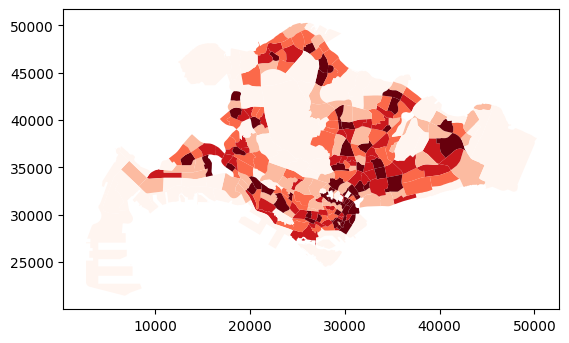

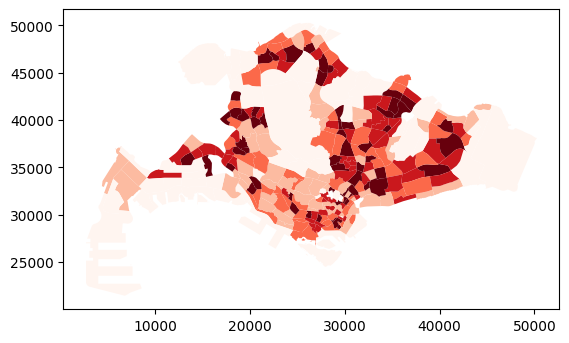

In [72]:

bus_merged.plot('Weekday_incoming_dens', cmap='Reds', scheme='Quantiles')
bus_merged.plot('Weekday_outgoing_dens', cmap='Reds', scheme='Quantiles')

In [64]:
w = weights.Queen.from_dataframe(bus_merged, idVariable='subz')
w2 = higher_order(w, 3)
w.transform = 'R'
w2.transform = 'R'

0.02226825512750386 0.08


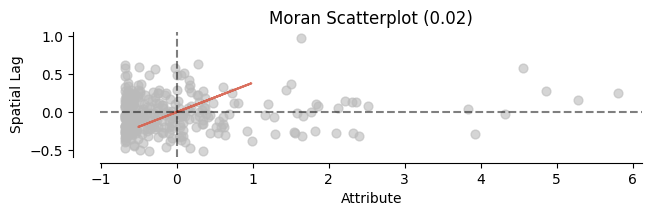

In [65]:
mi = esda.Moran(bus_merged['Weekday_outgoing_dens'], w2)
print(mi.I, mi.p_sim)
moran_scatterplot(mi);

0.05904271377616263 0.006


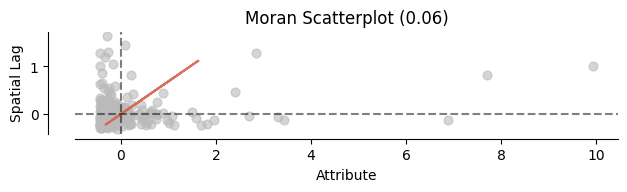

In [66]:
mi = esda.Moran(bus_merged['Weekday_incoming_dens'], w2)
print(mi.I, mi.p_sim)
moran_scatterplot(mi);

0.05904271377616263 0.008


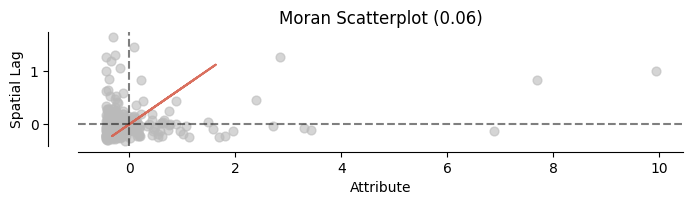

In [69]:
obs_mi = esda.Moran(bus_merged['Weekday_incoming_dens'], w2)
print(obs_mi.I, obs_mi.p_sim)
moran_scatterplot(obs_mi)
plt.tight_layout()

In [67]:
vals = bus_merged['Weekday_incoming_dens'].tolist()

permu = []
for _ in tqdm(range(999)):
    vals2 = vals.copy()
    random.shuffle(vals2)
    bus_merged['temp_shuffle'] = vals2
    mi = esda.Moran(bus_merged['temp_shuffle'], w2)
    permu.append(mi.I)
len(permu)

100%|██████████| 999/999 [00:13<00:00, 71.95it/s]


999

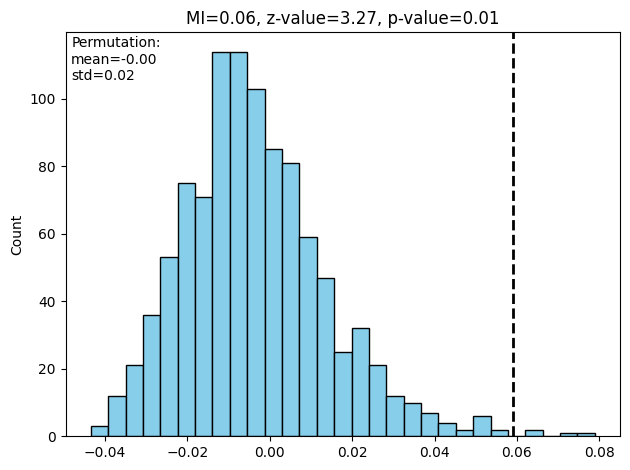

In [70]:
fig, ax = plt.subplots()
sns.histplot(permu, ax=ax, fc='skyblue')
ax.axvline(x=obs_mi.I, c='k', lw=2, ls='--')
ax.text(0.01, 0.99, 'Permutation:\nmean={:.2f}\nstd={:.2f}'.format(np.mean(permu), np.std(permu)), transform=ax.transAxes, ha='left', va='top')
obs_res = 'MI={:.2f}, z-value={:.2f}, p-value={:.2f}'.format(obs_mi.I, obs_mi.z_norm, obs_mi.p_sim)
ax.set_title(obs_res)
plt.tight_layout()